# Descripción de los datos


## Corpus Twitter

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data_twitter/tweets_finanzas_clean.csv", delimiter=";")
df

,Tweet,Target,Sent_Target,Sent_Sociedad,Sent_Empresas,tweet_clean
0,Repsol empezará a enviar crudo desde Venezuela...,Repsol,POS,POS,POS,repsol empezará enviar crudo venezuela europa
1,Tras vetar el petróleo de Moscú todos miran al...,gas,NEG,NEG,NEG,tras vetar petróleo moscú miran gas ruleta rus...
2,"Las demoras de Bruselas, Madrid y Lisboa retra...",luz,NEG,NEG,NEG,demoras bruselas madrid lisboa retrasan plan a...
3,La gran banca se iguala en rentabilidad a las ...,banca,POS,POS,POS,gran banca iguala rentabilidad grandes entidad...
4,Wall Street reacciona con caídas a los buenos ...,Wall Street,NEG,NEG,NEG,wall street reacciona caídas buenos datos empl...
...,...,...,...,...,...,...
1270,Unicaja Banco obtiene un beneficio neto de 116...,Unicaja Banco,POS,POS,NEG,unicaja banco obtiene beneficio neto millones ...
1271,"Merlin gana 262 millones, un 45% menos, por la...",Merlin,NEG,NEG,POS,merlin gana millones menos ausencia extraordin...
1272,Iberdrola se adjudica el mayor número de lotes...,Iberdrola,POS,POS,NEG,iberdrola adjudica mayor número lotes subasta ...
1273,CaixaBank lidera venta de fondos de pensiones ...,CaixaBank,POS,POS,NEG,caixabank lidera venta fondos pensiones invers...


Text(0.5, 1.0, 'Distribución de sentimiento empresas')

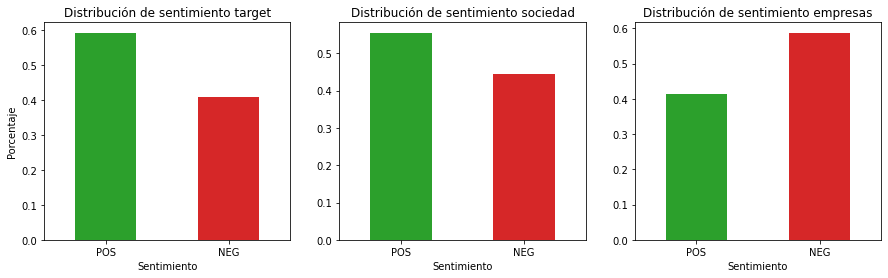

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

df['Sent_Target'].value_counts(normalize=True).loc[["POS", "NEG"]].plot(kind='bar', ax=ax1, 
                                                     color=["C2", "C3"])
ax1.tick_params(labelrotation=0)
ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Sentimiento')
ax1.set_title(("Distribución de sentimiento target"))


df['Sent_Sociedad'].value_counts(normalize=True).loc[["POS", "NEG"]].plot(kind='bar', ax=ax2,
                                                    color=["C2", "C3"])
ax2.tick_params(labelrotation=0)
ax2.set_xlabel('Sentimiento')
ax2.set_title(("Distribución de sentimiento sociedad"))


df['Sent_Empresas'].value_counts(normalize=True).loc[["POS", "NEG"]].plot(kind='bar', ax=ax3,
                                                    color=["C2", "C3"])
ax3.tick_params(labelrotation=0)
ax3.set_xlabel('Sentimiento')
ax3.set_title(("Distribución de sentimiento empresas"))

In [ ]:
df_POS = df.loc[df["Sent_Target"]== "POS"]
df_NEG = df.loc[df["Sent_Target"]== "NEG"]

In [ ]:
count_vect = CountVectorizer(ngram_range=(1,1))
X_counts_POS = count_vect.fit_transform(df_POS["tweet_clean"])

matriz_POS = pd.DataFrame(X_counts_POS.toarray(),
                          columns=count_vect.get_feature_names_out())
matriz_POS = matriz_POS.T.sort_values(by=0, ascending=False)

count_POS = matriz_POS.sum(axis='columns').sort_values(ascending=False)

In [ ]:
# NOOOOOOOOOOOOOOOOOOOOOOOO
tfidf_transformer = TfidfTransformer(use_idf=True)
X_TFIDF_POS = tfidf_transformer.fit_transform(X_counts_POS)

matriz_TFIDF_POS = pd.DataFrame(X_TFIDF_POS.toarray(),
                          columns=count_vect.get_feature_names_out())
TFIDF_POS = matriz_TFIDF_POS.T.sum(axis="columns").sort_values(ascending=False)

In [ ]:
X_counts_NEG = count_vect.fit_transform(df_NEG["tweet_clean"])

matriz_NEG = pd.DataFrame(X_counts_NEG.toarray(),
                          columns=count_vect.get_feature_names_out())
matriz_NEG = matriz_NEG.T.sort_values(by=0, ascending=False)

count_NEG = matriz_NEG.sum(axis="columns").sort_values(ascending=False)

In [ ]:
# NOOOOOOOOOOOOOOOOOOOOOOOO
X_TFIDF_NEG = tfidf_transformer.fit_transform(X_counts_NEG)

matriz_TFIDF_NEG = pd.DataFrame(X_TFIDF_NEG.toarray(),
                          columns=count_vect.get_feature_names_out())
TFIDF_NEG = matriz_TFIDF_NEG.T.sum(axis="columns").sort_values(ascending=False)

Text(0.5, 1.0, 'Tokens más repetidos para el sentimiento negativo del target')

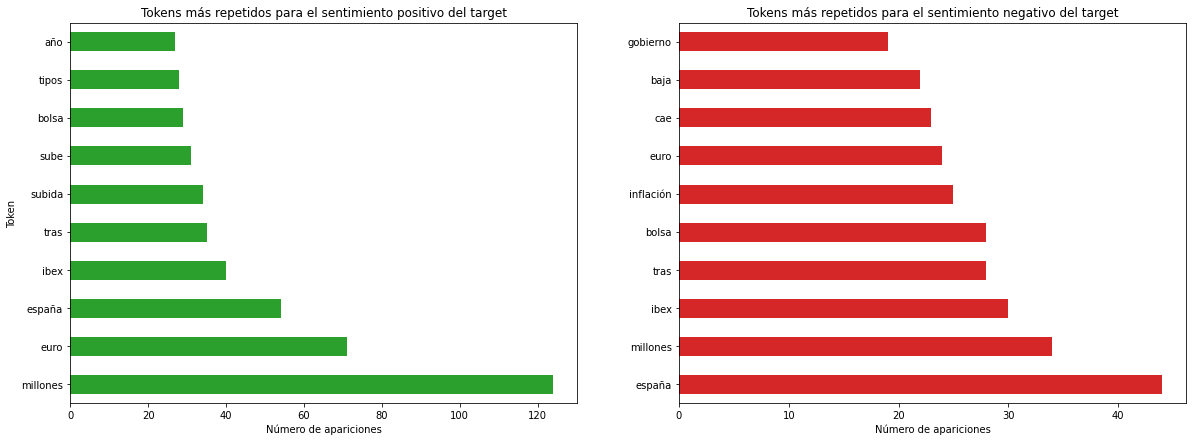

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

count_POS[0:10].plot(kind='barh', ax=ax1, color="C2")
ax1.set(xlabel='Número de apariciones', ylabel='Token')
ax1.set_title(("Tokens más repetidos para el sentimiento positivo del target"))

count_NEG[0:10].plot(kind='barh', ax=ax2, color = "C3")
ax2.set(xlabel="Número de apariciones")
ax2.set_title(("Tokens más repetidos para el sentimiento negativo del target"))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

TFIDF_POS[0:10].plot(kind='barh', ax=ax1)
ax1.set(xlabel='TF-IDF', ylabel='Token')
ax1.set_title(("Tokens más relevantes para el sentimiento positivo del target"))

TFIDF_NEG[0:10].plot(kind='barh', ax=ax2)
ax2.set(xlabel="TF-IDF")
ax2.set_title(("Tokens más relevantes para el sentimiento negativo del target"))

Ahora mostramos los bigramas más relevantes según el sentimiento del target.

In [ ]:
count_vect = CountVectorizer(ngram_range=(2,2))
# POS
X_counts_POS = count_vect.fit_transform(df_POS["tweet_clean"])

tfidf_transformer = TfidfTransformer(use_idf=True)
X_TFIDF_POS = tfidf_transformer.fit_transform(X_counts_POS)

matriz_TFIDF_POS = pd.DataFrame(X_TFIDF_POS.toarray(),
                          columns=count_vect.get_feature_names_out())
TFIDF_POS = matriz_TFIDF_POS.T.sum(axis="columns").sort_values(ascending=False)

# NEG
X_counts_NEG = count_vect.fit_transform(df_NEG["tweet_clean"])
X_TFIDF_NEG = tfidf_transformer.fit_transform(X_counts_NEG)

matriz_TFIDF_NEG = pd.DataFrame(X_TFIDF_NEG.toarray(),
                          columns=count_vect.get_feature_names_out())
TFIDF_NEG = matriz_TFIDF_NEG.T.sum(axis="columns").sort_values(ascending=False)

Text(0.5, 1.0, 'Bigramas más relevantes para el sentimiento negativo del target')

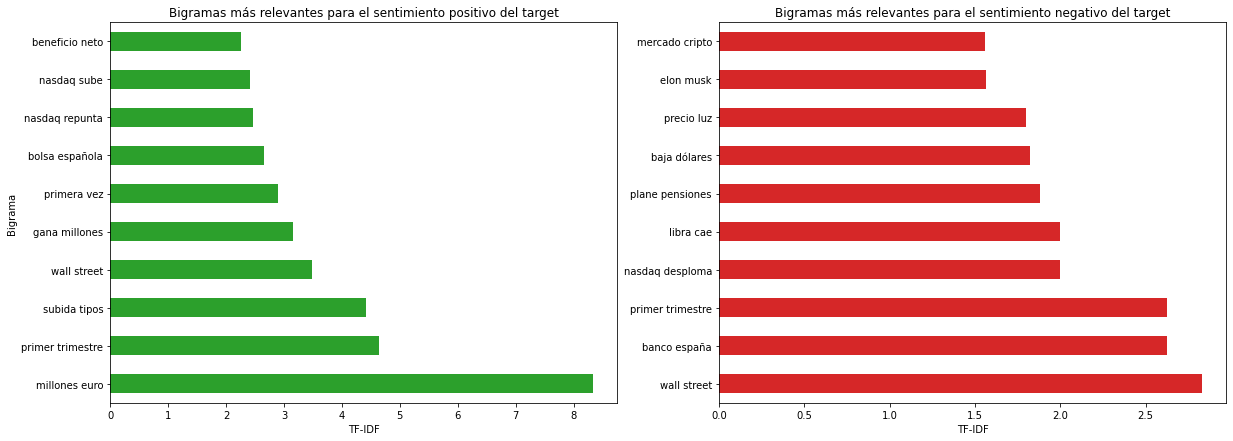

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

TFIDF_POS[0:10].plot(kind='barh', ax=ax1, color="C2")
ax1.set(xlabel='TF-IDF', ylabel='Bigrama')
ax1.set_title(("Bigramas más relevantes para el sentimiento positivo del target"))

TFIDF_NEG[0:10].plot(kind='barh', ax=ax2, color="C3")
ax2.set(xlabel="TF-IDF")
ax2.set_title(("Bigramas más relevantes para el sentimiento negativo del target"))

## Corpus de noticias web 
Veamos la distribución de los datos para el otro corpus proporcionado.

In [ ]:
df2 = pd.read_csv("data_web/headings_finanzas_clean.csv")
df2

,ID,Heading,Target,S. Target,S. Others,S. Society,text_clean
0,1360,Apple da el salto al 5G con el iPhone 12,Apple,1.0,0.0,0.0,apple da salto g iphone
1,3526,"Bankinter gana 220 millones hasta septiembre, ...",Bankinter,-1.0,0.0,0.0,bankinter gana millones septiembre menos
2,3528,Vueling garantiza el empleo de todos sus pilot...,Vueling,1.0,0.0,1.0,vueling garantiza empleo pilotos final
3,3735,La actividad empresarial de la zona euro se co...,actividad empresarial de la zona euro,-1.0,-1.0,-1.0,actividad empresarial zona euro contrajo octub...
4,4384,Inditex firma un acuerdo para mantener el empl...,Inditex,1.0,0.0,1.0,inditex firma acuerdo mantener empleo transfor...
...,...,...,...,...,...,...,...
2282,6537317,IPSA cierra al alza el día en que Chile gira e...,IPSA,1.0,0.0,0.0,ipsa cierra alza día chile gira conducción pol...
2283,6572132,Profeco suspende gasolineras de Shell por irre...,gasolineras de Shell,-1.0,0.0,-1.0,profeco suspende gasolineras shell irregularid...
2284,6582599,Guerra entre los comités de Alu Ibérica por el...,comités de Alu Ibérica,-1.0,0.0,0.0,guerra comités alu ibérica acuerdo alcoa
2285,6588182,123tinta confía la logística de sus pedidos a MRW,123tinta,1.0,1.0,0.0,tinta confía logística pedidos mrw


Text(0.5, 1.0, 'Distribución de sentimiento empresas')

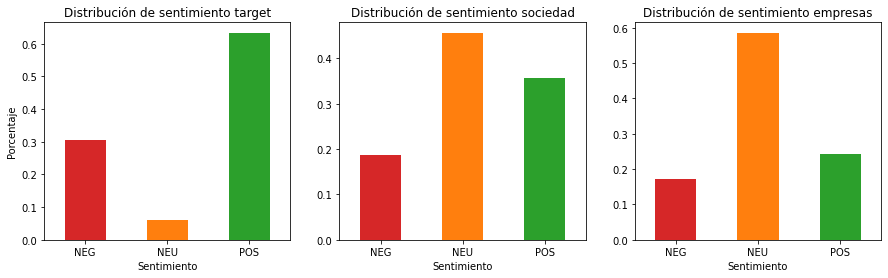

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

df2['S. Target'].value_counts(normalize=True).loc[[-1.0, 0.0, 1.0]].plot(kind='bar', 
                                                                        ax=ax1, 
                                                                        color=["C3", "C1", "C2"])
ax1.tick_params(labelrotation=0)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = 'NEG'
labels[1] = 'NEU'
labels[2] = 'POS'
ax1.set_xticklabels(labels)

ax1.set_ylabel('Porcentaje')
ax1.set_xlabel('Sentimiento')
ax1.set_title(("Distribución de sentimiento target"))


df2['S. Society'].value_counts(normalize=True).loc[[-1.0, 0.0, 1.0]].plot(kind='bar', 
                                                                        ax=ax2,
                                                                        color=["C3", "C1", "C2"])
ax2.tick_params(labelrotation=0)
ax2.set_xticklabels(labels)
ax2.set_xlabel('Sentimiento')
ax2.set_title(("Distribución de sentimiento sociedad"))


df2['S. Others'].value_counts(normalize=True).loc[[-1.0, 0.0, 1.0]].plot(kind='bar', 
                                                                         ax=ax3,
                                                                         color=["C3", "C1", "C2"])
ax3.tick_params(labelrotation=0)
ax3.set_xticklabels(labels)
ax3.set_xlabel('Sentimiento')
ax3.set_title(("Distribución de sentimiento empresas"))

In [ ]:
df2_POS = df2.loc[df2["S. Target"]== 1]
df2_NEG = df2.loc[df2["S. Target"]== -1]
df2_NEU = df2.loc[df2["S. Target"]== 0]

In [ ]:
# POS
count_vect = CountVectorizer(ngram_range=(1,1))
X_counts2_POS = count_vect.fit_transform(df2_POS["text_clean"])

matriz2_POS = pd.DataFrame(X_counts2_POS.toarray(),
                          columns=count_vect.get_feature_names_out())
matriz2_POS = matriz2_POS.T.sort_values(by=0, ascending=False)

count2_POS = matriz2_POS.sum(axis='columns').sort_values(ascending=False)

# NEG
X_counts2_NEG = count_vect.fit_transform(df2_NEG["text_clean"])

matriz2_NEG = pd.DataFrame(X_counts2_NEG.toarray(),
                          columns=count_vect.get_feature_names_out())
matriz2_NEG = matriz2_NEG.T.sort_values(by=0, ascending=False)

count2_NEG = matriz2_NEG.sum(axis="columns").sort_values(ascending=False)

# NEU
X_counts2_NEU = count_vect.fit_transform(df2_NEU["text_clean"])

matriz2_NEU = pd.DataFrame(X_counts2_NEU.toarray(),
                          columns=count_vect.get_feature_names_out())
matriz2_NEU = matriz2_NEU.T.sort_values(by=0, ascending=False)

count2_NEU = matriz2_NEU.sum(axis="columns").sort_values(ascending=False)

Text(0.5, 1.0, 'Tokens más repetidos para el sentimiento positivo del target')

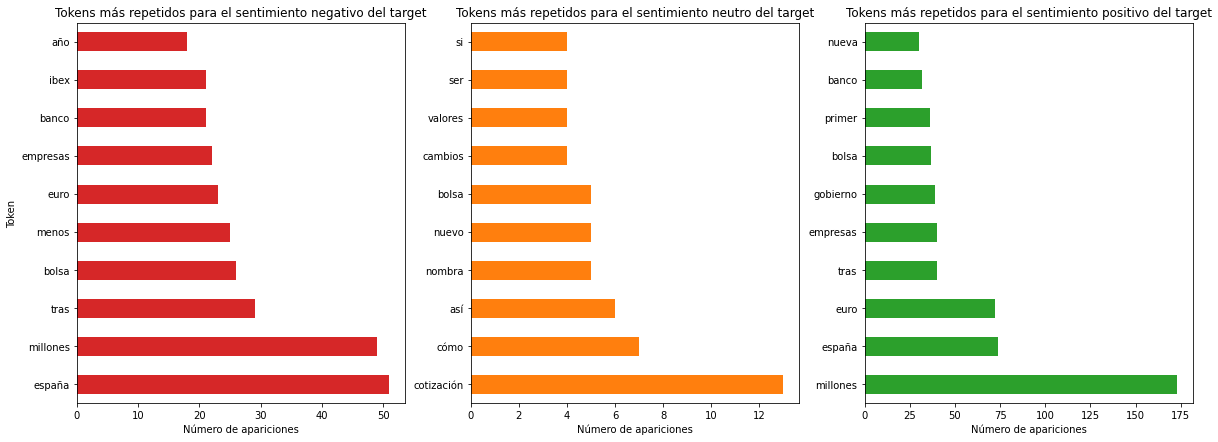

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,7))

count2_NEG[0:10].plot(kind='barh', ax=ax1, color = "C3")
ax1.set(xlabel="Número de apariciones", ylabel='Token')
ax1.set_title(("Tokens más repetidos para el sentimiento negativo del target"))

count2_NEU[0:10].plot(kind='barh', ax=ax2, color = "C1")
ax2.set(xlabel="Número de apariciones")
ax2.set_title(("Tokens más repetidos para el sentimiento neutro del target"))

count2_POS[0:10].plot(kind='barh', ax=ax3, color="C2")
ax3.set(xlabel='Número de apariciones')
ax3.set_title(("Tokens más repetidos para el sentimiento positivo del target"))



In [ ]:
count_vect = CountVectorizer(ngram_range=(2,2))
# POS
X_counts2_POS = count_vect.fit_transform(df2_POS["text_clean"])

tfidf_transformer = TfidfTransformer(use_idf=True)
X_TFIDF2_POS = tfidf_transformer.fit_transform(X_counts2_POS)

matriz2_TFIDF_POS = pd.DataFrame(X_TFIDF2_POS.toarray(),
                          columns=count_vect.get_feature_names_out())
TFIDF2_POS = matriz2_TFIDF_POS.T.sum(axis="columns").sort_values(ascending=False)

# NEG
X_counts2_NEG = count_vect.fit_transform(df2_NEG["text_clean"])
X_TFIDF2_NEG = tfidf_transformer.fit_transform(X_counts2_NEG)

matriz2_TFIDF_NEG = pd.DataFrame(X_TFIDF2_NEG.toarray(),
                          columns=count_vect.get_feature_names_out())
TFIDF2_NEG = matriz2_TFIDF_NEG.T.sum(axis="columns").sort_values(ascending=False)

# NEU
X_counts2_NEU = count_vect.fit_transform(df2_NEU["text_clean"])
X_TFIDF2_NEU = tfidf_transformer.fit_transform(X_counts2_NEU)

matriz2_TFIDF_NEU = pd.DataFrame(X_TFIDF2_NEU.toarray(),
                          columns=count_vect.get_feature_names_out())
TFIDF2_NEU = matriz2_TFIDF_NEU.T.sum(axis="columns").sort_values(ascending=False)

Text(0.5, 1.0, 'Bigramas más relevantes para el sentimiento positivo del target')

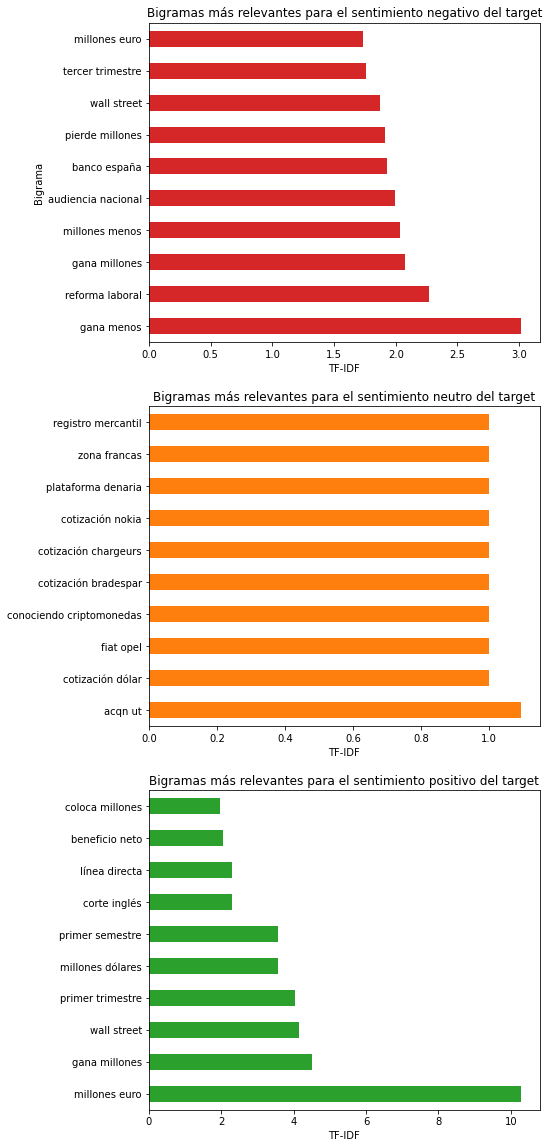

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7,20))

TFIDF2_NEG[0:10].plot(kind='barh', ax=ax1, color="C3")
ax1.set(xlabel="TF-IDF", ylabel='Bigrama')
ax1.set_title(("Bigramas más relevantes para el sentimiento negativo del target"))

TFIDF2_NEU[0:10].plot(kind='barh', ax=ax2, color="C1")
ax2.set(xlabel="TF-IDF")
ax2.set_title(("Bigramas más relevantes para el sentimiento neutro del target"))

TFIDF2_POS[0:10].plot(kind='barh', ax=ax3, color="C2")
ax3.set(xlabel='TF-IDF')
ax3.set_title(("Bigramas más relevantes para el sentimiento positivo del target"))